<a href="https://colab.research.google.com/github/vijayrai22/Americans-Sign-Language-Classification/blob/master/ASL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" --header="Cookie: _ga=GA1.3.808878542.1573815087" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-data-sets/23079/29550/upload/asl_alphabet_train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589400796&Signature=T%2B5WLSIJvxhGL5fHYapZTWPro3A1isImPw70flQwNBG4aPWQyn%2F%2B4iYYyIRJ%2BwzfgBc%2BAcZeJ0BM58b3LtBF4zgr8Owv9PHhV%2BHObT%2BnCjl%2BRs6X87520UjYBAijrNAZZyOKPwpZpnk6OY%2BdLWE9DmTHDs51lv1ZmhvkInaV39PG3swkCQ1w9tCP1g4HFPMvKPAC%2F8hv9trViNJWC1r8JnptYaZPKS8P9TRJUtAVT%2FF7TSasQ2ls4P5aogkrfb%2FqkwHs29vZZV21udII9gCg6p%2B1XY%2FRk9r3fGTluksbzhxVRmX5RtOBpdQZaMA%2B7A6So79wntRjvN6jagNwqbSqdQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dasl_alphabet_train.zip" -c -O 'asl_alphabet_train.zip'

--2020-05-11 11:40:17--  https://storage.googleapis.com/kaggle-data-sets/23079/29550/upload/asl_alphabet_train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589400796&Signature=T%2B5WLSIJvxhGL5fHYapZTWPro3A1isImPw70flQwNBG4aPWQyn%2F%2B4iYYyIRJ%2BwzfgBc%2BAcZeJ0BM58b3LtBF4zgr8Owv9PHhV%2BHObT%2BnCjl%2BRs6X87520UjYBAijrNAZZyOKPwpZpnk6OY%2BdLWE9DmTHDs51lv1ZmhvkInaV39PG3swkCQ1w9tCP1g4HFPMvKPAC%2F8hv9trViNJWC1r8JnptYaZPKS8P9TRJUtAVT%2FF7TSasQ2ls4P5aogkrfb%2FqkwHs29vZZV21udII9gCg6p%2B1XY%2FRk9r3fGTluksbzhxVRmX5RtOBpdQZaMA%2B7A6So79wntRjvN6jagNwqbSqdQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dasl_alphabet_train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.71.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.71.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098308892 (1.0G) [application/zip]
Saving to: ‘asl_alphabet_train.zip’

asl_alphabet_tra

In [0]:
!unzip -x '/content/asl_alphabet_train.zip'

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/B/B785.jpg  
  inflating: asl_alphabet_train/B/B781.jpg  
  inflating: asl_alphabet_train/B/B78.jpg  
  inflating: asl_alphabet_train/B/B775.jpg  
  inflating: asl_alphabet_train/B/B774.jpg  
  inflating: asl_alphabet_train/B/B770.jpg  
  inflating: asl_alphabet_train/B/B77.jpg  
  inflating: asl_alphabet_train/B/B767.jpg  
  inflating: asl_alphabet_train/B/B765.jpg  
  inflating: asl_alphabet_train/B/B764.jpg  
  inflating: asl_alphabet_train/B/B763.jpg  
  inflating: asl_alphabet_train/B/B758.jpg  
  inflating: asl_alphabet_train/B/B746.jpg  
  inflating: asl_alphabet_train/B/B744.jpg  
  inflating: asl_alphabet_train/B/B742.jpg  
  inflating: asl_alphabet_train/B/B741.jpg  
  inflating: asl_alphabet_train/B/B740.jpg  
  inflating: asl_alphabet_train/B/B739.jpg  
  inflating: asl_alphabet_train/B/B736.jpg  
  inflating: asl_alphabet_train/B/B731.jpg  
  inflating: asl_alphabet_train/B/B730.jpg  
  infl

In [0]:
from numpy.random import seed
#!pip install tensorflow==1.14
import cv2
from sklearn.model_selection import train_test_split
import os
import numpy as np
import skimage
from skimage.transform import resize
import csv
import itertools
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = 'asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

Samples images for letter A


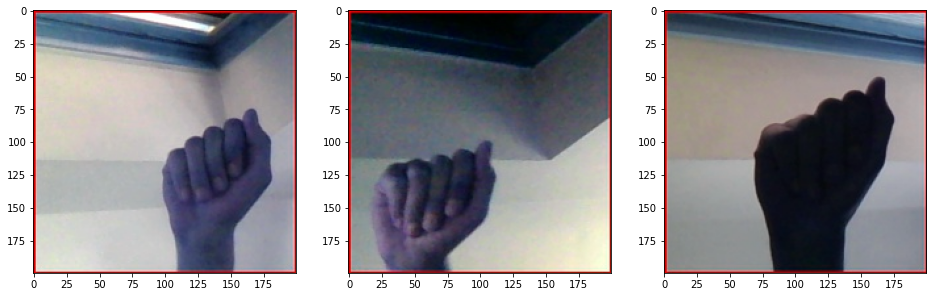

In [0]:
plot_three_samples('A')

Samples images for letter H


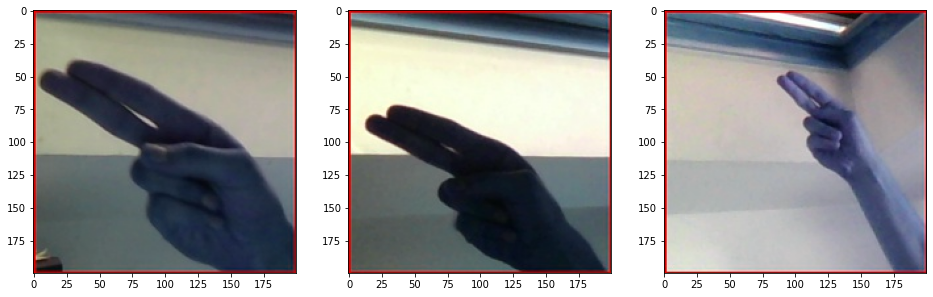

In [0]:
plot_three_samples('H')

Samples images for letter Y


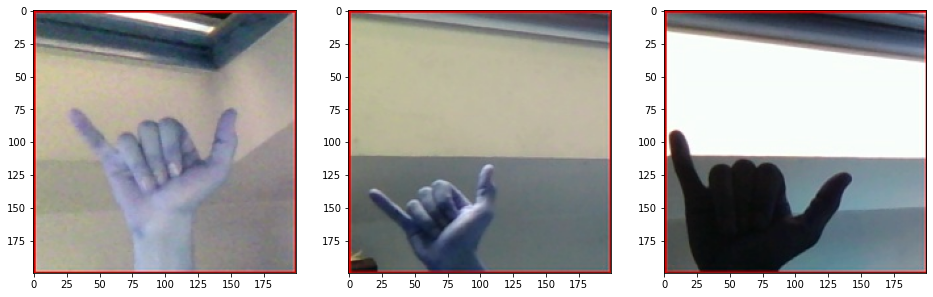

In [0]:
plot_three_samples('Y')

In [0]:
data_dir = "asl_alphabet_train"
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True,validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [0]:
train_generator

In [0]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [0]:
history = my_model.fit(xtrain,ytrain, epochs=10,validation_data=(xtest,ytest), verbose=1)#,callbacks = [MetricsCheckpoint('logs')])
# Evaluate model
score = my_model.evaluate(xtest,ytest, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = my_model.predict(xtest)

In [0]:
history =my_model.fit_generator(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
1224/1224 [==============================] - 124s 102ms/step - loss: 1.3581 - accuracy: 0.5751 - val_loss: 0.6953 - val_accuracy: 0.6939
Epoch 2/10
1224/1224 [==============================] - 114s 93ms/step - loss: 0.3286 - accuracy: 0.8878 - val_loss: 1.0141 - val_accuracy: 0.7802
Epoch 3/10
1224/1224 [==============================] - 111s 90ms/step - loss: 0.2072 - accuracy: 0.9310 - val_loss: 1.1054 - val_accuracy: 0.8143
Epoch 4/10
1224/1224 [==============================] - 110s 90ms/step - loss: 0.1563 - accuracy: 0.9484 - val_loss: 0.4417 - val_accuracy: 0.8322
Epoch 5/10
1224/1224 [==============================] - 111s 91ms/step - loss: 0.1402 - accuracy: 0.9545 - val_loss: 0.3331 - val_accuracy: 0.8316
Epoch 6/10
1224/1224 [==============================] - 109s 89ms/step - loss: 0.1208 - accuracy: 0.9615 - val_loss: 0.5426 - val_accuracy: 0.8572
Epoch 7/10
1224/1224 [==============================] - 110s 90ms/step - loss: 0.1121 - accuracy: 0.9649 - val_loss: 

In [0]:
Y_pred = my_model.predict_generator(val_generator)
y_pred = np.argmax(Y_pred, axis=1)


In [0]:
target_names=[f for f in sorted(os.listdir('/content/asl_alphabet_train'))]
print(target_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx=confusion_matrix(val_generator.classes, y_pred)
confusion_mtx.shape
print(classification_report(val_generator.classes, y_pred, target_names=target_names))
 

In [0]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(history, val_generator, val_generator.classes,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()